##### Created by Sekhar Chandra Padhi

# **Problem Statement:**
### You are the Data Scientist at a telecom company `Leo` whose customers are churning out to its competitors. You have to analyse the data of your company and find insights and stop your customers from churning out to other telecom companies





## **Basic Libraries**

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### **Importing Dataset From kaggle using API**

In [101]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/telco-customer-churn


In [102]:
df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [103]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


##### **Domain** –`Telecom`


## **Domain Context –**
#### Customer churn, in simple terms means that the customer has stopped doing business with the company and this is a common problem when it comes to telecom industries. To avoid this, companies use predictive analysis to gauge the factors responsible for a customer to leave the company. These churn prediction models help in finding out the customer base that are most likely to churn out.

#### `Lab Environment:` **Google Colab,Hosted Jupyter Notebook service.**

## ***A) Data Manipulation:***

a.Find the total number of male customers

In [104]:
#Total number of male customers
m_cust = df[df['gender']=='Male']

print(f'Total number of male customers are {len(m_cust)}')

Total number of male customers are 3555


In [105]:
#Alternative
print(f'Total number of male customers are {sum(df["gender"]=="Male")}')

Total number of male customers are 3555


 b. Find the total number of customers whose Internet Service is ‘DSL’

In [106]:
#Customers whose Internet Service is ‘DSL’
dsl_cus = df[df['InternetService']=='DSL']

print(f'Total number of customers whose Internet Service is DSL are {len(dsl_cus)}')

Total number of customers whose Internet Service is DSL are 2421


In [107]:
#Alternative
print(f'Total number of customers whose Internet Service is DSL are {sum(df["InternetService"]=="DSL")}')

Total number of customers whose Internet Service is DSL are 2421


c. Extract all the Female senior citizens whose Payment Method is Mailed check & store the
result in ‘new_customer’

In [108]:
new_customer = df[(df['gender']=='Female') & (df['SeniorCitizen']==1) & (df['PaymentMethod']=='Mailed check')]

In [109]:
new_customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
139,0390-DCFDQ,Female,1,Yes,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.45,70.45,Yes
176,2656-FMOKZ,Female,1,No,No,15,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.45,1145.7,Yes
267,3197-ARFOY,Female,1,No,No,19,Yes,No,Fiber optic,Yes,...,No,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,105.00,2007.25,No
451,5760-WRAHC,Female,1,No,No,22,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,Month-to-month,Yes,Mailed check,69.75,1545.4,No
470,4933-IKULF,Female,1,No,No,17,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,330.6,No


d.Extract all those customers whose tenure is less than 10 months or their Total charges is less
than 500$ & store the result in ‘new_customer’

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [111]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [112]:
new_customer2 = df[(df['tenure']<10) | (df['TotalCharges']<500)]

In [113]:
new_customer2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No


In [114]:
# Convert data type
df["customerID"] = df["customerID"].astype("string")
df["SeniorCitizen"] = df["SeniorCitizen"].astype("object")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   string 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [118]:
object_col = df.select_dtypes(include=['object']).columns.tolist()

In [119]:
df[object_col] = df[object_col].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   string  
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

In [126]:
df['TotalCharges'].isna().sum()

np.int64(11)

In [130]:
(df['tenure']==0).sum()

np.int64(11)

In [131]:
# filling total chrarges as 0
df['TotalCharges']=df['TotalCharges'].fillna(0)

## ***B) Data Visualization:***

a. Build a pie-chart to show the distribution of customers would be churning out

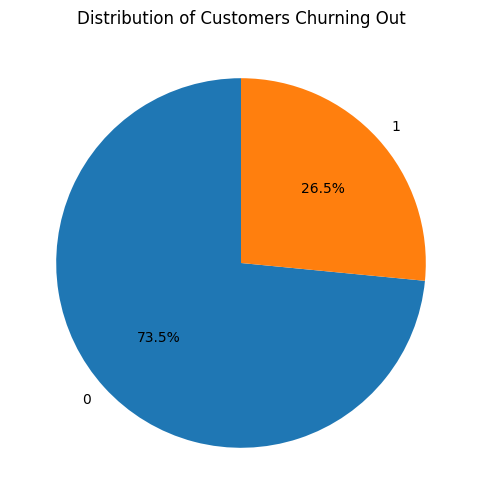

In [132]:
plt.figure(figsize=(10, 6))
plt.pie(df['Churn'].value_counts(), labels=df['Churn'].unique(), autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Customers Churning Out')
plt.show()

b. Build a bar-plot to show the distribution of ‘Internet Service’

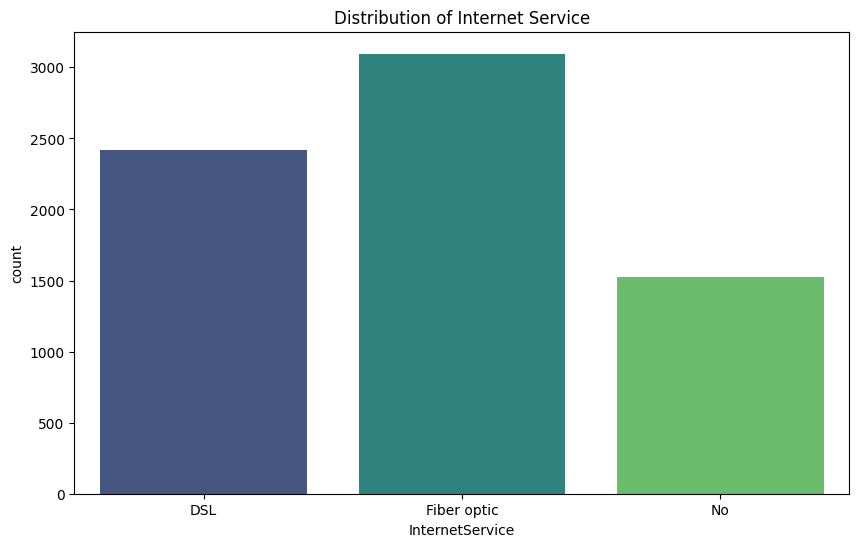

In [133]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='InternetService',palette="viridis")
plt.title('Distribution of Internet Service')
plt.show()

## ***C) Model Building:***

a. Build a sequential model using Keras, to find out if the customerwouldchurn or not, using
‘tenure’ as the feature and ‘Churn’ as the dependent/target column:
* i. The visible/input layer should have 12 nodes with ‘Relu’ as activation function.
* ii. This model would have 1 hidden layer with 8 nodes and ‘Relu’ as activation function
* iii. Use ‘Adam’ as the optimization algorithm
* iv. Fit the model on the train set, with number of epochs to be 150
* v. Predict the values on the test set and build a confusion matrix
* vi. Plot the ‘Accuracy vs Epochs’ graph

#### **Important Libraries**

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [135]:
# Encode Churn column
le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])

In [136]:
# Feature and Target column
x = df[['tenure']].values
y = df['Churn'].values

In [137]:
# Scale the 'tenure' feature
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [138]:
from tensorflow.keras.layers import BatchNormalization

In [139]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [140]:
model = Sequential()
model.add(Dense(12, activation='relu', input_shape=(1,)))
model.add(BatchNormalization())
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [141]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [142]:
# Train the model
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.2)

Epoch 1/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5434 - loss: 0.7538 - val_accuracy: 0.7507 - val_loss: 0.5259
Epoch 2/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7227 - loss: 0.5625 - val_accuracy: 0.7507 - val_loss: 0.5108
Epoch 3/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7430 - loss: 0.5241 - val_accuracy: 0.7604 - val_loss: 0.5105
Epoch 4/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7265 - loss: 0.5322 - val_accuracy: 0.7507 - val_loss: 0.5007
Epoch 5/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7250 - loss: 0.5352 - val_accuracy: 0.7507 - val_loss: 0.4967
Epoch 6/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7300 - loss: 0.5316 - val_accuracy: 0.7507 - val_loss: 0.4955
Epoch 7/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7226 - loss: 0.5371 - val_accuracy: 0.7507 - val_loss: 0.4949
Epoch 8/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7352 - loss: 0.5140 - val_acc

In [143]:
# Predict on the test set
y_pred = model.predict(X_test)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [144]:
y_pred = (y_pred > 0.5) # Convert probabilities to binary predictions

In [145]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [146]:
# Build confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[950  86]
 [257 116]]


In [147]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7565649396735273


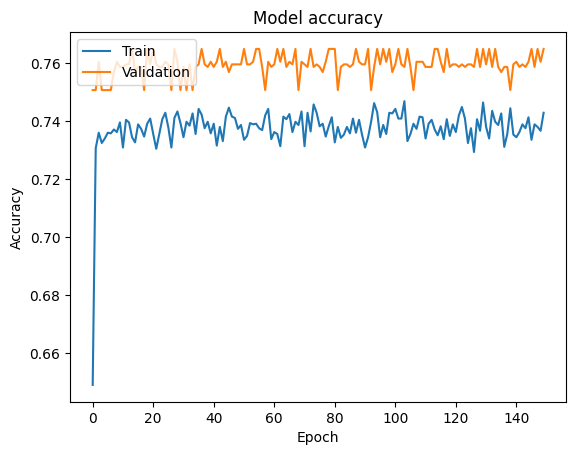

In [148]:
# Plot Accuracy vs Epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

b. Build the 2nd model using same target and feature variables:
* i. Add a drop-out layer after the input layer with drop-out value of 0.3
* ii. Add a drop-out layer after the hidden layer with drop-out value of 0.2
* iii. Predict the values on the test set and build a confusion matrix
* iv. Plot the ‘Accuracy vs Epochs’ graph

In [149]:
model2 = Sequential()
model2.add(Dense(12, activation='relu', input_shape=(1,)))
model2.add(Dropout(0.3))  # Dropout layer after the input layer
model2.add(Dense(8, activation='relu'))
model2.add(Dropout(0.2))  # Dropout layer after the hidden layer
model2.add(Dense(1, activation='sigmoid'))

In [150]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [151]:
history2 = model2.fit(X_train,y_train, epochs=150, batch_size=32, validation_split=0.2)

Epoch 1/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.5506 - loss: 1.7610 - val_accuracy: 0.7507 - val_loss: 0.5288
Epoch 2/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6256 - loss: 0.9641 - val_accuracy: 0.7507 - val_loss: 0.4984
Epoch 3/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6481 - loss: 0.7143 - val_accuracy: 0.7507 - val_loss: 0.4957
Epoch 4/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6776 - loss: 0.6368 - val_accuracy: 0.7507 - val_loss: 0.5026
Epoch 5/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7089 - loss: 0.6022 - val_accuracy: 0.7507 - val_loss: 0.5128
Epoch 6/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7081 - loss: 0.5719 - val_accuracy: 0.7507 - val_loss: 0.5188
Epoch 7/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7137 - loss: 0.5710 - val_accuracy: 0.7507 - val_loss: 0.5206
Epoch 8/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6996 - loss: 0.5799 - val_acc

In [152]:
# Predict on the test set
y_pred2 = model2.predict(X_test)
y_pred2 = (y_pred2 > 0.5)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [153]:
# Build confusion matrix
cm2 = confusion_matrix(y_test, y_pred2)
print("Confusion Matrix:")
print(cm2)

Confusion Matrix:
[[1036    0]
 [ 373    0]]


In [154]:
# Calculate accuracy
accuracy2 = accuracy_score(y_test, y_pred2)
print("Accuracy:", accuracy2)

Accuracy: 0.7352732434350603


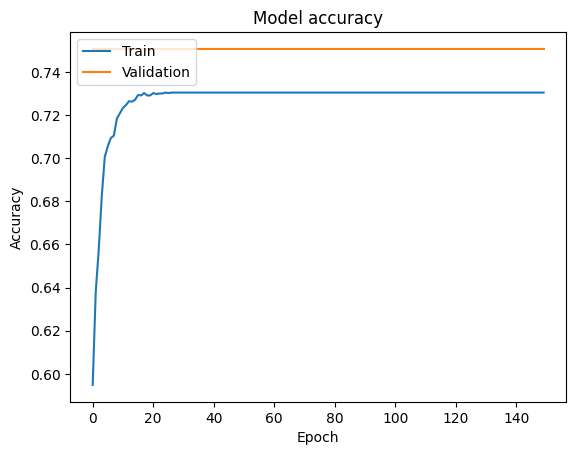

In [155]:
# Plot Accuracy vs Epochs
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

c. Build the 3rd model using ‘Tenure’, ’Monthly Charges’ & ‘Total Charges’ as the features and
‘Churn’ as the dependent/target column:
* i. The visible/input layer should have 12 nodes with ‘Relu’ as activation function.
* ii. This model would have 1 hidden layer with 8 nodes and ‘Relu’ as activation function
* iii. Use ‘Adam’ as the optimization algorithm
* iv. Fit the model on the train set, with number of epochs to be 150
* v. Predict the values on the test set and build a confusion matrix
* vi. Plot the ‘Accuracy vs Epochs’ graph

In [156]:
# Select features and target
features = ['tenure', 'MonthlyCharges', 'TotalCharges']
target = 'Churn'

In [157]:
X = df[features]
y = df[target]

In [158]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [159]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [160]:
# Build the model with Batch Normalization
model3 = Sequential()
model3.add(Dense(12, activation='relu', input_shape=(3,)))  # Input layer
model3.add(Dense(8, activation='relu'))  # Hidden layer
model3.add(Dense(1, activation='sigmoid'))  # Output layer

In [161]:
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [162]:
# Train the model
history3 = model3.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.2)

Epoch 1/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.4982 - loss: 0.7003 - val_accuracy: 0.7595 - val_loss: 0.5262
Epoch 2/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7524 - loss: 0.5184 - val_accuracy: 0.7817 - val_loss: 0.4540
Epoch 3/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7763 - loss: 0.4778 - val_accuracy: 0.7782 - val_loss: 0.4438
Epoch 4/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7771 - loss: 0.4692 - val_accuracy: 0.7817 - val_loss: 0.4399
Epoch 5/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7867 - loss: 0.4589 - val_accuracy: 0.7817 - val_loss: 0.4383
Epoch 6/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7752 - loss: 0.4640 - val_accuracy: 0.7853 - val_loss: 0.4358
Epoch 7/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7799 - loss: 0.4728 - val_accuracy: 0.7746 - val_loss: 0.4350
Epoch 8/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7827 - loss: 0.4731 - val_acc

In [163]:
# Predict on the test set
y_pred3 = model3.predict(X_test)
y_pred3 = (y_pred3 > 0.5)  # Convert probabilities to binary predictions

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


Confusion Matrix:
[[955  81]
 [203 170]]
Accuracy: 0.7984386089425124


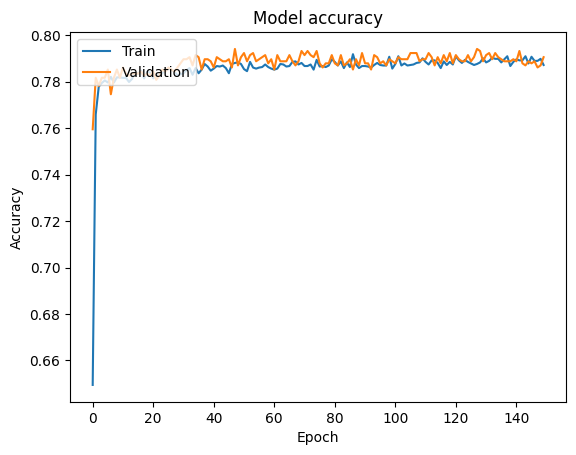

In [164]:
# Build confusion matrix
cm3 = confusion_matrix(y_test, y_pred3)
print("Confusion Matrix:")
print(cm3)

# Calculate accuracy
accuracy3 = accuracy_score(y_test, y_pred3)
print("Accuracy:", accuracy3)

# Plot Accuracy vs Epochs
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()